In [ ]:
# This is a notebook to show how a support vector machine  
# performs on the simplified classic digits data set. 

#Author: Viviana Acquaviva

#License: BSD but really should be TBD - just be nice.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.utils import shuffle
from sklearn import datasets
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder #for exercises only

#Just to make our life easier!
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

%matplotlib inline

In [2]:
#We can use a toy data set (digits)

digits = datasets.load_digits()
data = scale(digits.data) #normalization

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

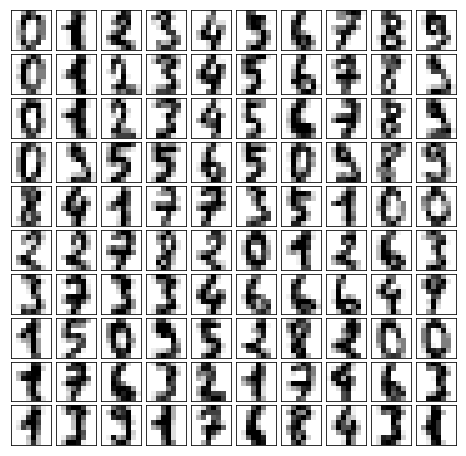

In [3]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')

In [4]:
model = SVC()

In [ ]:
#Let's do a simple cross validation

In [5]:
cross_val_score(model, data, labels)

array([0.96179402, 0.95993322, 0.95134228])

In [6]:
#optimizing SVC: THIS IS NOT YET NESTED CV

parameters = {'kernel':['rbf','poly'], \
              'gamma':[0.01, 0.1, 0.5], 'C':[1,10,100], 'degree': [2,4,6]}
nmodels = np.product([len(el) for el in parameters.values()])
start = time.time()
model = GridSearchCV(SVC(), parameters, cv = StratifiedKFold(n_splits=4, shuffle=True), \
                     verbose = 1, n_jobs = 4)
model.fit(data, labels)
stop = time.time()
print('Best params, best score:', "{:.4f}".format(model.best_score_), \
      model.best_params_)
print('Time per model (s):', "{:.4f}".format((stop-start)/float(nmodels*4)))

Fitting 4 folds for each of 54 candidates, totalling 216 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   25.0s


Best params, best score: 0.9839 {'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}
Time per model (s): 0.1302


[Parallel(n_jobs=4)]: Done 216 out of 216 | elapsed:   28.0s finished


To get some insights on how the models are behaving, we can take a look at the object "cv_results_", after selecting some important columns.

In [7]:
scores_df = pd.DataFrame(model.cv_results_)

In [8]:
pd.set_option('display.max_columns', 500)
pd.options.display.max_colwidth = 100 #Another acceptable syntax

In [9]:
#Look at columns

scores_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_degree', 'param_gamma', 'param_kernel', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

I chose to list the parameters, their train/test scores, and the timings, ranked by the test scores.

In [14]:
scores_df[['params', 'mean_test_score', 'mean_train_score', 'mean_fit_time']].sort_values(by = 'mean_test_score', ascending = False)

,params,mean_test_score,mean_train_score,mean_fit_time
19,"{'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}",0.983862,0.999630,0.137675
41,"{'C': 100, 'degree': 2, 'gamma': 0.5, 'kernel': 'poly'}",0.982749,1.000000,0.107666
21,"{'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}",0.982749,1.000000,0.127918
37,"{'C': 100, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}",0.982749,1.000000,0.108813
39,"{'C': 100, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}",0.982749,1.000000,0.108117
23,"{'C': 10, 'degree': 2, 'gamma': 0.5, 'kernel': 'poly'}",0.982749,1.000000,0.160737
5,"{'C': 1, 'degree': 2, 'gamma': 0.5, 'kernel': 'poly'}",0.982749,1.000000,0.145307
3,"{'C': 1, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}",0.982749,1.000000,0.128508
30,"{'C': 10, 'degree': 6, 'gamma': 0.01, 'kernel': 'rbf'}",0.981636,1.000000,0.098820
24,"{'C': 10, 'degree': 4, 'gamma': 0.01, 'kernel': 'rbf'}",0.981636,1.000000,0.119932


### We can now deploy nested CV!

In [ ]:
#Important! COMMENT

#Outer k-fold:
    
outercv = StratifiedKFold(n_splits=5, shuffle=True) #creates 5 disjoint splits

innercv = StratifiedKFold(n_splits=4, shuffle=True) #creates 4 disjoint splits

i=0

winning_model_scores = []

for train_index, test_index in outercv.split(data,labels): #This runs the outer cross validation
    
    i+=1
    
    print('Fold ' ,i, 'outer cross validation')
    
    X_train = data[train_index] #"yellow" training set
    y_train = labels[train_index]
    
    X_test = data[test_index]
    y_test = labels[test_index]
    
    #optimizing SVC: this replaces the inner loop!
    
    parameters = {'kernel':['rbf','poly'], \
              'gamma':[0.01, 0.1, 0.5], 'C':[1,10,100], 'degree': [2,4,6]}
    nmodels = np.product([len(el) for el in parameters.values()])
    start = time.time()
    model = GridSearchCV(SVC(), parameters, cv = innercv, scoring = 'accuracy', \
                     verbose = 1, n_jobs = 4)
    model.fit(X_train, y_train)
    stop = time.time()
    print('Best params, best score:', "{:.4f}".format(model.best_score_), model.best_params_)
    print('Time per model (s):', "{:.4f}".format((stop-start)/float(nmodels*4)))

    #Compute test scores with optimal parameters on outer i-th test fold
    
    winner = model.best_estimator_
    
    winner.fit(X_train, y_train)
    
    ypred = winner.predict(X_test)
    
    #Note the scoring appears explicitly here!
    
    winning_model_scores.append(metrics.accuracy_score(y_test,ypred)) #append this to the outer cv results
    
print('The average of the winning model scores (i.e. the generalization error) is', \
      np.mean(winning_model_scores), np.std(winning_model_scores) )


#### Conclusion: The performance that you can expect from your classifier on new data is .....

#### However, your final model will be the one found by using grid-search CV on the full data set, picking the winning parameters, and its anticipated generalization error will be the one given above.

Notes: Grid Search is often too expensive, can use Random Search. 
    
After checking learning curves, one can also select a smaller data set for the same reason.

### Exercises :) 

Exercise 1: How does the SVM compare with RF/GBT on the LAE/OII data set?

Exercise 2: Play with the original MNIST data set (often used for benchmarking of models, see http://yann.lecun.com/exdb/mnist/). A reasonably wide Grid Search takes a couple of days because there are 70,000 images and are 28x28 (784 features). You can play with the code below that already knows about great parameters.

In [ ]:
# MNIST classification using Support Vector algorithm with RBF kernel
# Author: Krzysztof Sopyla <krzysztofsopyla@gmail.com>
# https://ksopyla.com
# License: MIT

import datetime as dt

dataset2 = datasets.fetch_mldata("MNIST Original")

#Note: IF THE ABOVE DOESN'T WORK, you need to download the MNIST data set (.mat file) e.g. from
#https://github.com/amplab/datascience-sp14/blob/master/lab7/mldata/mnist-original.mat
#Then place it in the "~/scikit_learn_data/mldata" directory

#data field is 70k x 784 array, each row represents pixels from 28x28=784 image
images = dataset2.data
targets = dataset2.target

#---------------- classification begins -----------------
#scale data for [0,255] -> [0,1]
#sample smaller size for testing
rand_idx = np.random.choice(images.shape[0],30000) #change number here to see accuracy and time scaling
X_data =images[rand_idx]/255.0
Y      = targets[rand_idx]

#full dataset classification
#X_data = images/255.0
#Y = targets

#split data to train and test
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y, test_size=0.15, random_state=42)


################ Classifier with good params ###########
# Create a classifier: a support vector classifier

param_C = 5
param_gamma = 0.05
classifier = svm.SVC(C=param_C,gamma=param_gamma)

#We learn the digits on train part
start_time = dt.datetime.now()
print('Start learning at {}'.format(str(start_time)))
classifier.fit(X_train, y_train)
end_time = dt.datetime.now() 
print('Stop learning {}'.format(str(end_time)))
elapsed_time= end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))


########################################################
# Now predict the value of the test
expected = y_test
predicted = classifier.predict(X_test)

#show_some_digits(X_test,predicted,title_text="Predicted {}")

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
      
cm = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cm)

print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))